# E1.Project-Scissor_Rock_Paper_Classifier


### Method

#####  1. 필요한 라이브러리 불러오기

In [1]:
from PIL import Image
import os, glob
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

##### 2. 훈련데이터들의 사이즈를 28X28로 바꿔주기 (순서: 가위 -> 바위 -> 보)

In [2]:
# 훈련데이터: 가위

### 가위 모든 파일 읽기 (경로: "/aiffel/rock_scissor_paper/scissor")
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

### 가위 모든 파일 28X28로 바꾸기
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")

    
# 훈련데이터: 바위

### 바위 모든 파일 읽기 (경로: "/aiffel/rock_scissor_paper/rock")
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

### 바위 모든 파일 28X28로 바꾸기
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("바위 이미지 resize 완료!")


# 훈련데이터: 보

### 보 모든 파일 읽기 (경로: "/aiffel/rock_scissor_paper/paper")
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

### 보 모든 파일 28X28로 바꾸기
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("보 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper/scissor
가위 이미지 resize 완료!
이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper/rock
바위 이미지 resize 완료!
이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper/paper
보 이미지 resize 완료!


##### 3. 라벨링 (가위: 0, 바위: 1, 보: 2)과 x_train 데이터 정규화

In [3]:
def load_data(img_path):
    number_of_data=300 # train 데이터 개수 300개
    img_size=28 # 28X28사이즈
    color=3 # RGB 
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # x_train data를 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


##### 4. 훈련데이터 한 장 불러와보기

라벨:  0


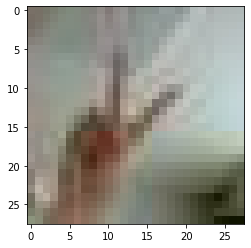

In [4]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

##### 5. 딥러닝 네트워크 설계하기

In [5]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (No

##### 6. 딥러닝 네트워크 학습시키기

In [6]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
10/10 [==============================] - 3s 318ms/step - loss: 15.8428 - accuracy: 0.3500
Epoch 2/10
10/10 [==============================] - 0s 2ms/step - loss: 2.8201 - accuracy: 0.4700
Epoch 3/10
10/10 [==============================] - 0s 2ms/step - loss: 1.0889 - accuracy: 0.6867
Epoch 4/10
10/10 [==============================] - 0s 2ms/step - loss: 0.6477 - accuracy: 0.7900
Epoch 5/10
10/10 [==============================] - 0s 2ms/step - loss: 0.4774 - accuracy: 0.8233
Epoch 6/10
10/10 [==============================] - 0s 1ms/step - loss: 0.3489 - accuracy: 0.8600
Epoch 7/10
10/10 [==============================] - 0s 2ms/step - loss: 0.2180 - accuracy: 0.9267
Epoch 8/10
10/10 [==============================] - 0s 2ms/step - loss: 0.2457 - accuracy: 0.9033
Epoch 9/10
10/10 [==============================] - 0s 2ms/step - loss: 0.1349 - accuracy: 0.9433
Epoch 10/10
10/10 [==============================] - 0s 2ms/step - loss: 0.0994 - accuracy: 0.9633


##### 7. 테스트데이터들의 사이즈를 28X28로 바꿔주기 (2. 방법을 테스트데이터에 적용)

In [7]:
# 테스트데이터 경로 : "/aiffel/rock_scissor_paper1" 원래 것에 1을 추가!



# 테스트데이터: 가위


### 가위 모든 파일 읽기 (경로: "/aiffel/rock_scissor_paper1/scissor")
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper1/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

### 가위 모든 파일 28X28로 바꾸기
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")



## 테스트데이터: 바위


### 바위 모든 파일 읽기 (경로: "/aiffel/rock_scissor_paper1/rock")
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper1/rock"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

### 바위 모든 파일 28X28로 바꾸기
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("바위 이미지 resize 완료!")



## 테스트데이터: 보


### 보 모든 파일 읽기 (경로: "/aiffel/rock_scissor_paper1/paper")
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper1/paper"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 보 모든 파일 28X28로 바꾸기
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("보 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper1/scissor
가위 이미지 resize 완료!
이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper1/rock
바위 이미지 resize 완료!
이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper1/paper
보 이미지 resize 완료!


##### 8. 라벨링 (가위: 0, 바위: 1, 보: 2)과 x_test 데이터 정규화 (3. 방법을 테스트데이터에 적용)

In [8]:
# Load_data 함수 => Load_tdata 함수로 변경하여 정의


def load_tdata(img_path): 
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=300  # test 데이터 300개
    img_size=28 # 28X28
    color=3 # RGB
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트데이터(x_test)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper1"
(x_test, y_test)=load_tdata(image_dir_path)
x_test_norm = x_test/255.0   # x_test를 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

테스트데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


##### 9. 데이터 한 장 불러와보기 

라벨:  0


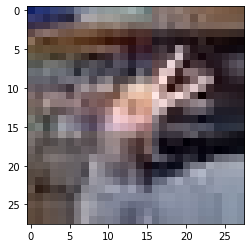

In [9]:
plt.imshow(x_test[0])
print('라벨: ', y_test[0])

##### 10. 훈련데이터로 학습시킨 모델로 테스트데이터의 정확도(Acccuracy) 측정

In [10]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_test, y_test, epochs=10)

Epoch 1/10
10/10 [==============================] - 0s 2ms/step - loss: 3.6771 - accuracy: 0.5167
Epoch 2/10
10/10 [==============================] - 0s 1ms/step - loss: 1.2694 - accuracy: 0.6933
Epoch 3/10
10/10 [==============================] - 0s 2ms/step - loss: 0.4207 - accuracy: 0.8333
Epoch 4/10
10/10 [==============================] - 0s 2ms/step - loss: 0.2252 - accuracy: 0.9133
Epoch 5/10
10/10 [==============================] - 0s 2ms/step - loss: 0.1224 - accuracy: 0.9567
Epoch 6/10
10/10 [==============================] - 0s 2ms/step - loss: 0.0816 - accuracy: 0.9800
Epoch 7/10
10/10 [==============================] - 0s 2ms/step - loss: 0.0617 - accuracy: 0.9867
Epoch 8/10
10/10 [==============================] - 0s 2ms/step - loss: 0.0426 - accuracy: 0.9933
Epoch 9/10
10/10 [==============================] - 0s 2ms/step - loss: 0.0468 - accuracy: 0.9900
Epoch 10/10
10/10 [==============================] - 0s 2ms/step - loss: 0.0322 - accuracy: 1.0000


### Disscussion

훈련데이터(Training data)로 학습시켰을 때 모델의 정확도(Accuracy)는 0.963이다.
만약 1이 되었다면 모델이 overfitting이 될 가능성이 높다.

훈련된 모델로 테스트데이터(Test data)를 분류해보았을 때 정확도는 1.000이다.
즉, 매우 정확하게 분류하였다.

따라서, 모델이 과접합(overfitting)되지 않고 훈련 데이터에 대해서 모델을 훈련시키는 데에 성공하였다!!

하지만, 매번 돌릴 때마다 두 데이터에 대한 분류 정확도는 다르게 나온다!

그렇지만 훈련데이터 보다 테스트데이터에서 분류 정확도가 높게 나오므로 모델의 하이퍼 파라미터 적절한 조건으로 주었다고 판단할 수 있다.

### 승리의 V

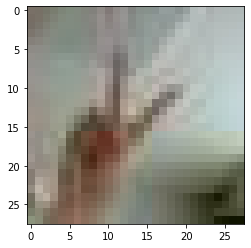

In [12]:
plt.imshow(x_train[0])

##### 헤헤헷...!